# Explore here

In [27]:
import pandas as pd

# Cargar el dataset
df = pd.read_csv('../data/raw/medical_insurance_cost.csv')

# Ver las dimensiones del dataset
print(df.shape)

# Información general del dataset
df_info = df.info()


(1338, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [28]:
# Descripción estadística de las columnas numéricas
print (df.describe())

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


In [29]:
# 1. Verificar si existen duplicados
duplicados = df.duplicated().sum()
print(f"Número de filas duplicadas: {duplicados}")

# Si existen duplicados, los eliminamos
if duplicados > 0:
    df = df.drop_duplicates()
    print(f"Duplicados eliminados. El nuevo tamaño del dataset es: {df.shape}")

# 2. Análisis de valores nulos
valores_nulos = df.isnull().sum()
print("\nValores nulos por columna:")
print(valores_nulos)

# Mostrar el porcentaje de valores nulos por columna
porcentaje_nulos = (valores_nulos / df.shape[0]) * 100
print("\nPorcentaje de valores nulos por columna:")
print(porcentaje_nulos)

Número de filas duplicadas: 1
Duplicados eliminados. El nuevo tamaño del dataset es: (1337, 7)

Valores nulos por columna:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Porcentaje de valores nulos por columna:
age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64


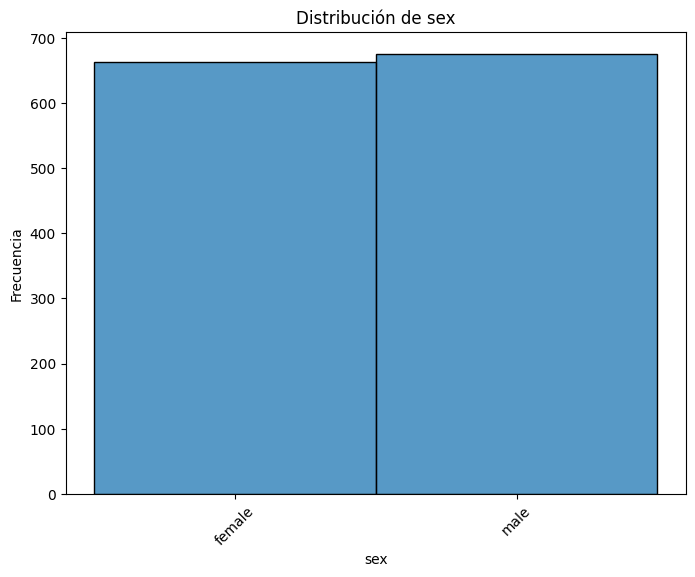

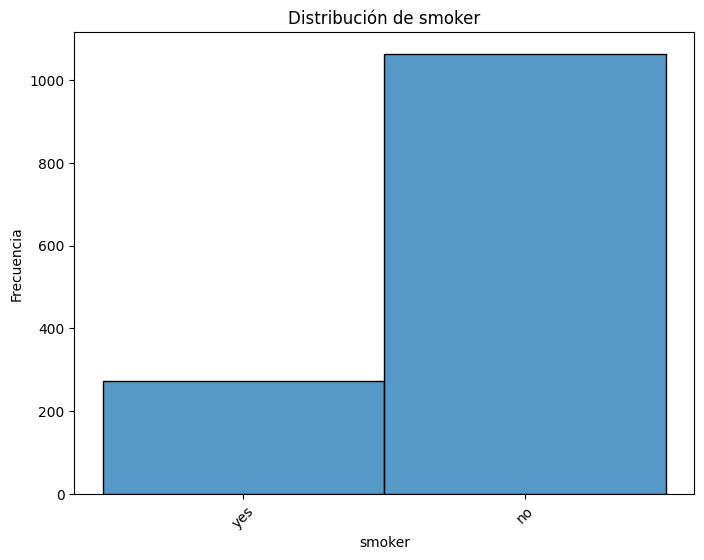

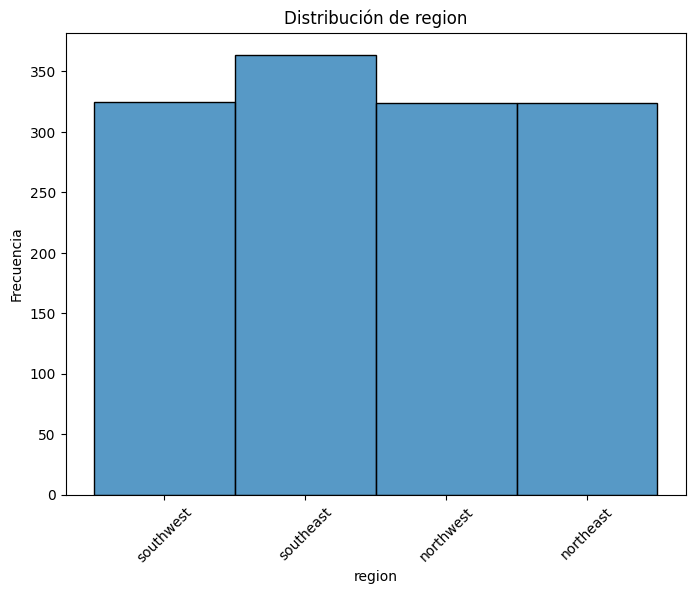

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Identificar las columnas categóricas
categorical_columns = df.select_dtypes(include=['object']).columns

# Graficar las variables categóricas
for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], discrete=True)
    plt.title(f'Distribución de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)
    plt.show()

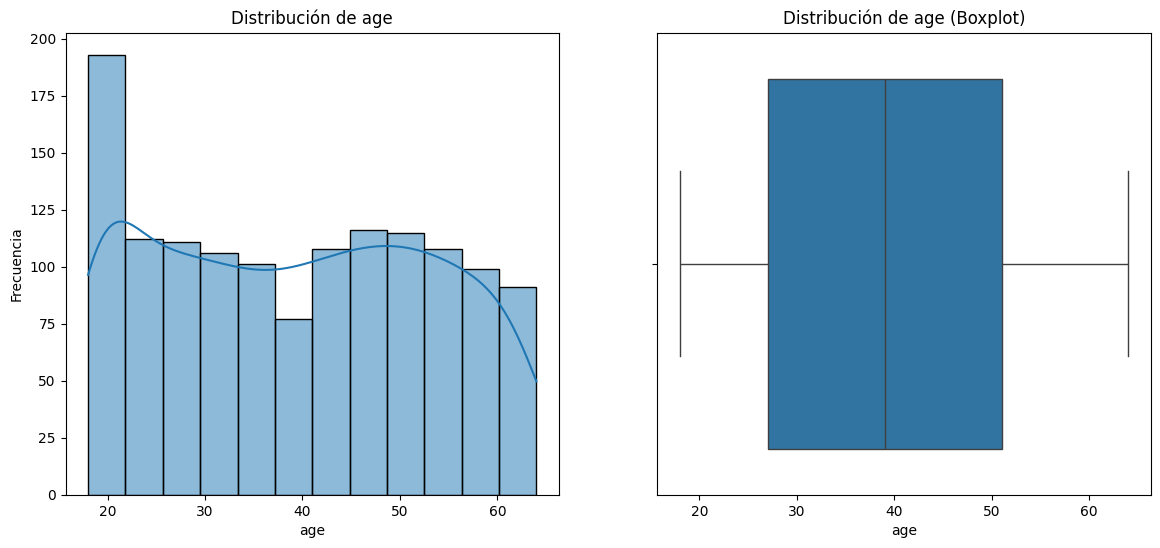

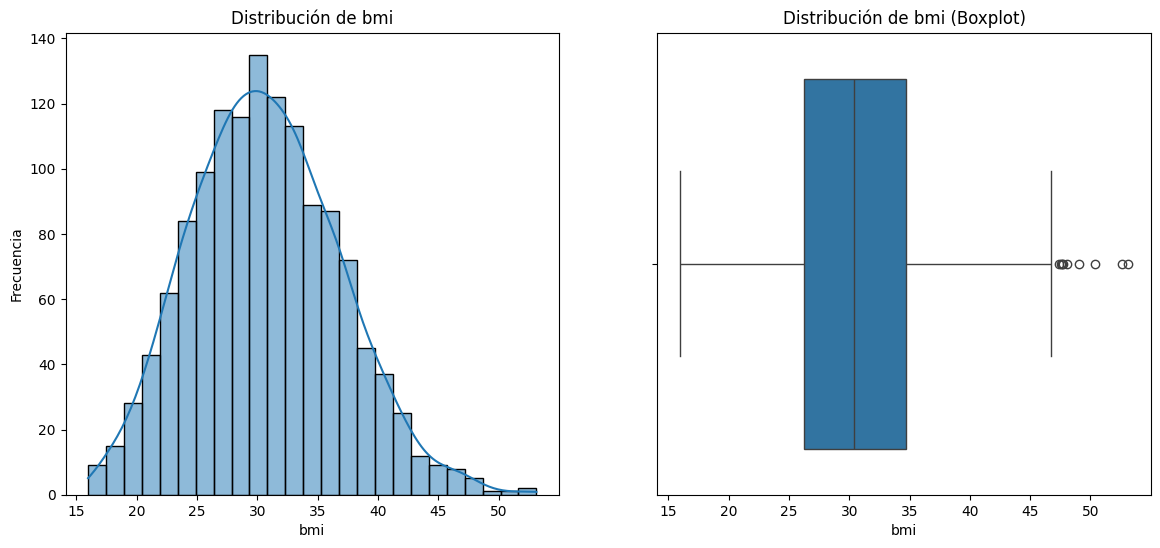

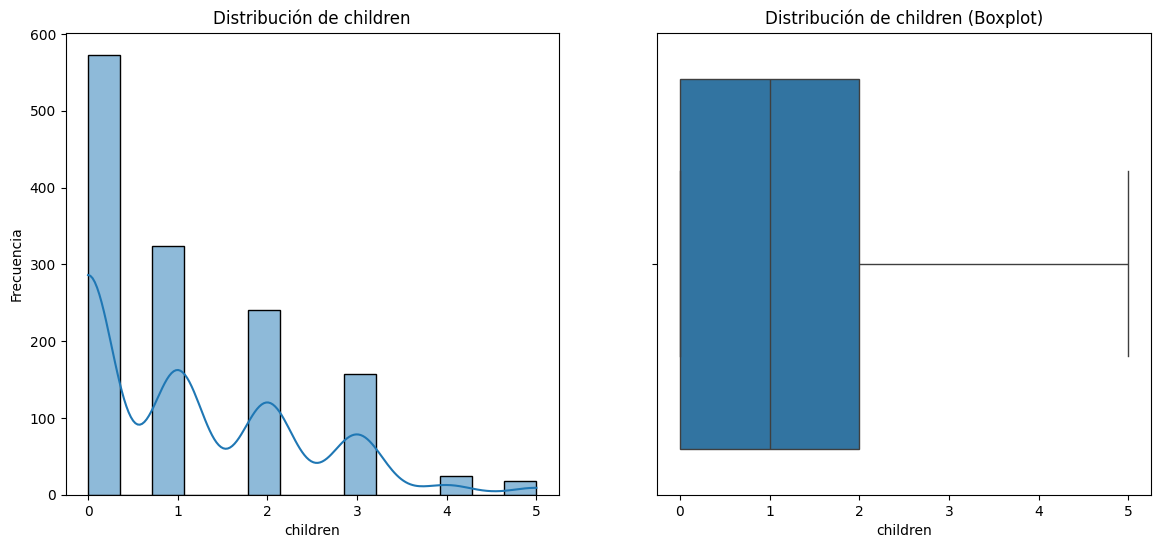

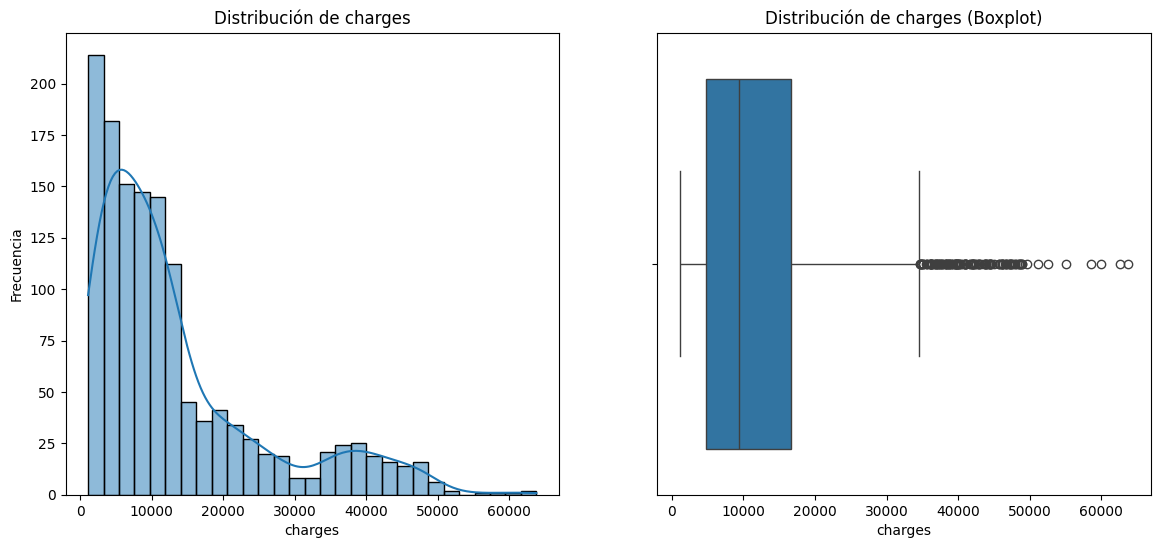

In [31]:
# Identificar las columnas numéricas
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Graficar las variables numéricas
for column in numerical_columns:
    plt.figure(figsize=(14, 6))

    # Histograma
    plt.subplot(1, 2, 1)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribución de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[column])
    plt.title(f'Distribución de {column} (Boxplot)')
    plt.xlabel(column)

    plt.show()

Edad (age): La distribución es aproximadamente uniforme con valores concentrados en los rangos de 18 a 60 años. El boxplot muestra que no hay outliers significativos.
Índice de Masa Corporal (bmi): La distribución es unimodal, con la mayoría de los valores entre 20 y 40. El boxplot muestra algunos valores atípicos en el extremo superior, lo que indica posibles outliers.
Número de Hijos (children): La distribución es discreta, con la mayoría de las personas teniendo entre 0 y 3 hijos. Aquí también se observan algunos valores extremos, aunque no muy significativos.
Coste del Seguro (charges): Esta es la variable objetivo. Su distribución es sesgada hacia la derecha, lo que indica que la mayoría de los costos están en rangos bajos o medios, pero con algunos valores muy altos que actúan como outliers.

In [32]:
#import numpy as np

# Aplicar la transformación logarítmica a la variable 'charges'
#df['charges_log'] = np.log(df['charges'] + 1)  # Agregamos 1 para evitar log(0) si existiera

# Verificar la nueva distribución
#plt.figure(figsize=(14, 6))

#plt.subplot(1, 2, 1)
#sns.histplot(df['charges'], kde=True)
#plt.title('Distribución Original de Charges')

#plt.subplot(1, 2, 2)
#sns.histplot(df['charges_log'], kde=True)
#plt.title('Distribución de Charges después de Transformación Logarítmica')

#plt.show()

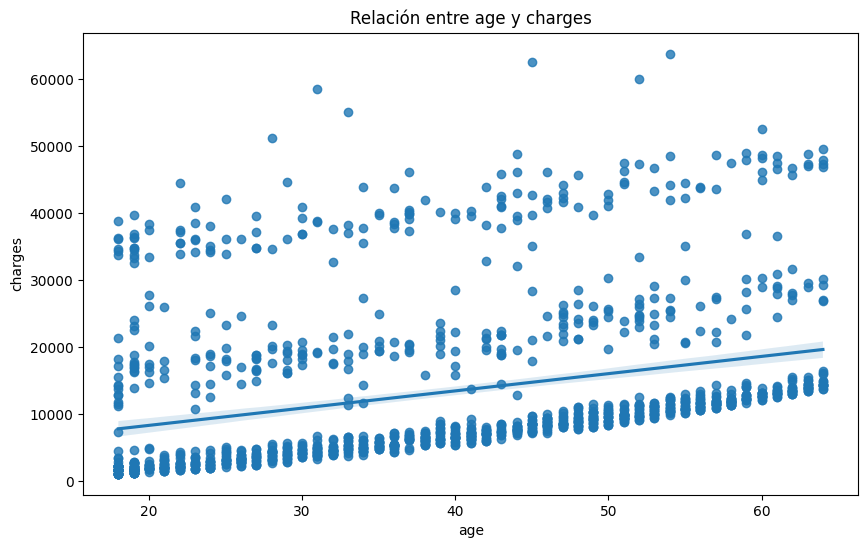

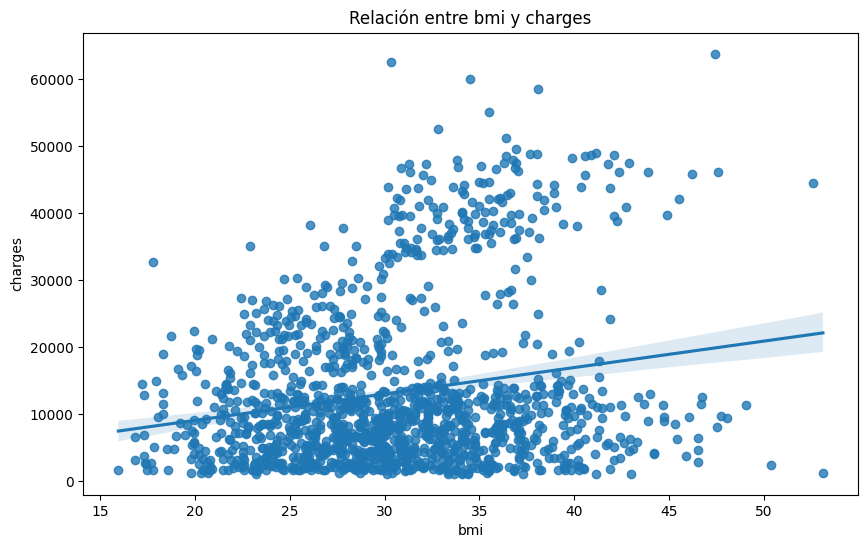

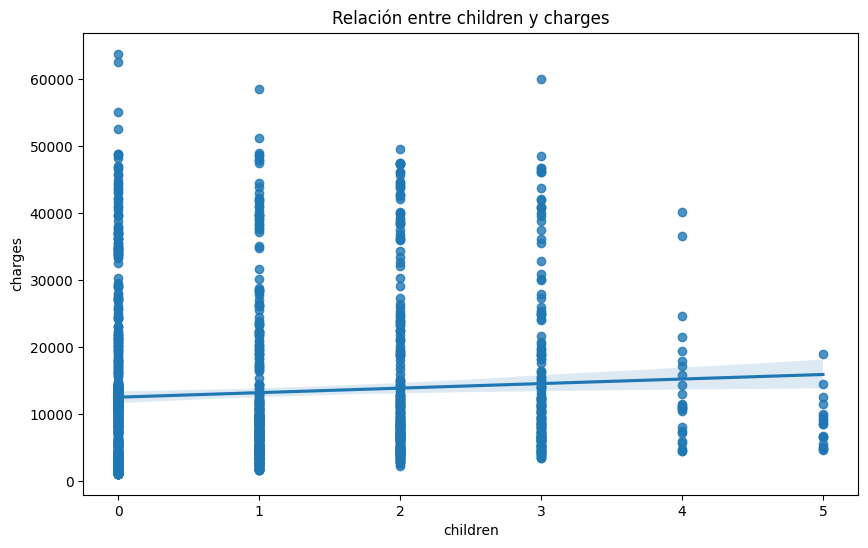

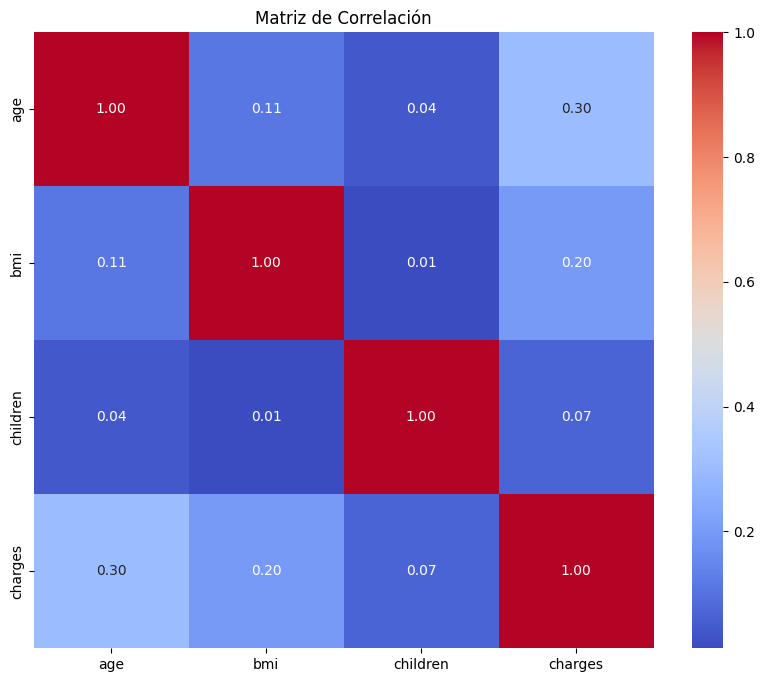

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Extraer solo las columnas numéricas
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# 2. Generar diagramas de dispersión con líneas de regresión
for column in numerical_columns:
    if column != 'charges' :  # Excluir las columnas 'charges' y 'charges_log'
        plt.figure(figsize=(10, 6))
        sns.regplot(x=df[column], y=df['charges'])
        plt.title(f'Relación entre {column} y charges')
        plt.xlabel(column)
        plt.ylabel('charges')
        plt.show()

# 3. Generar la matriz de correlación usando solo las columnas numéricas
corr_matrix = df[numerical_columns].corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

Lo de aplicar transf log no funciona bien.


No se identifican correlaciones fuertes: Como no hay pares de variables con correlaciones superiores a 0.7, no parece haber variables redundantes.

Todas las variables aportan información: Aunque algunas variables tienen una correlación más baja con la variable objetivo, aún pueden ser útiles en el modelo.

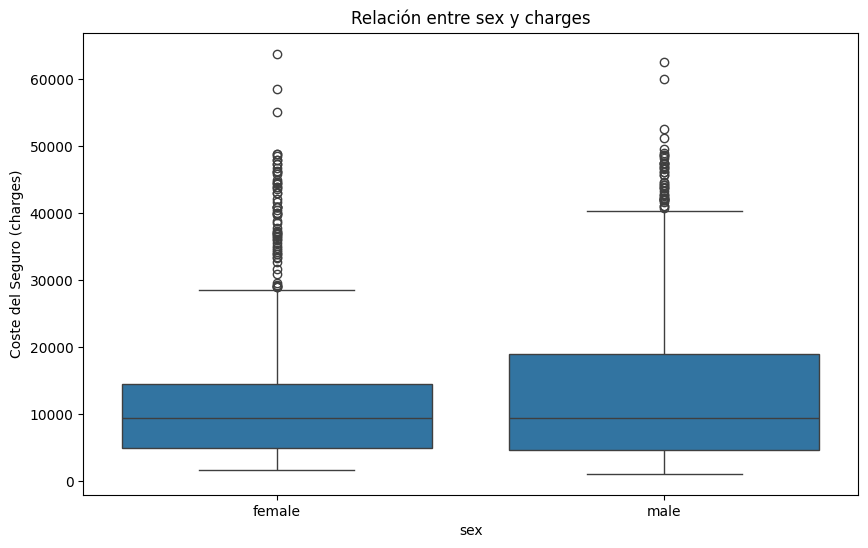

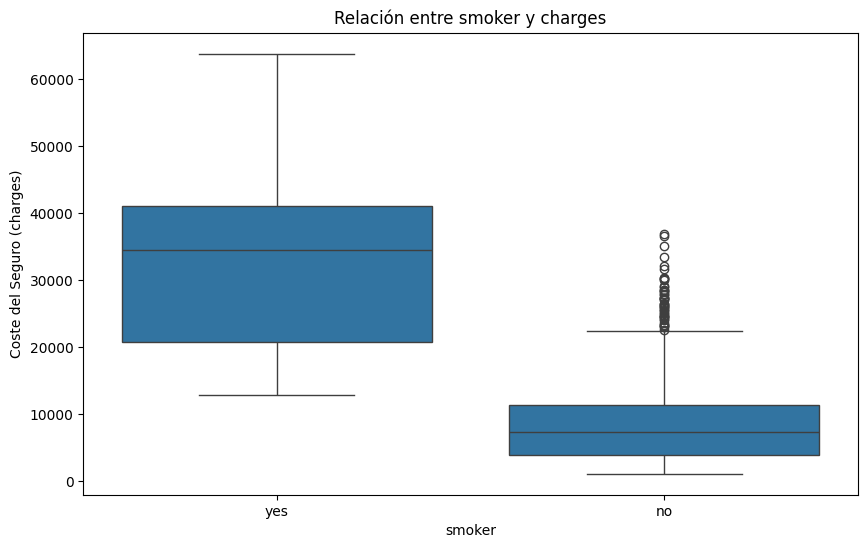

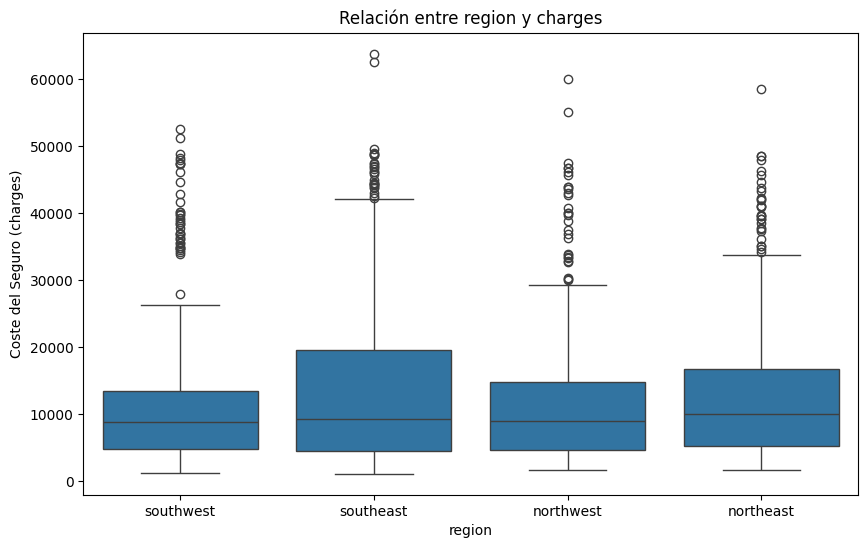

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Identificar las columnas categóricas
categorical_columns = df.select_dtypes(include=['object']).columns

# Graficar cada variable categórica vs charges
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column], y=df['charges'])
    plt.title(f'Relación entre {column} y charges')
    plt.xlabel(column)
    plt.ylabel('Coste del Seguro (charges)')
    plt.show()

tratamiento de outliers


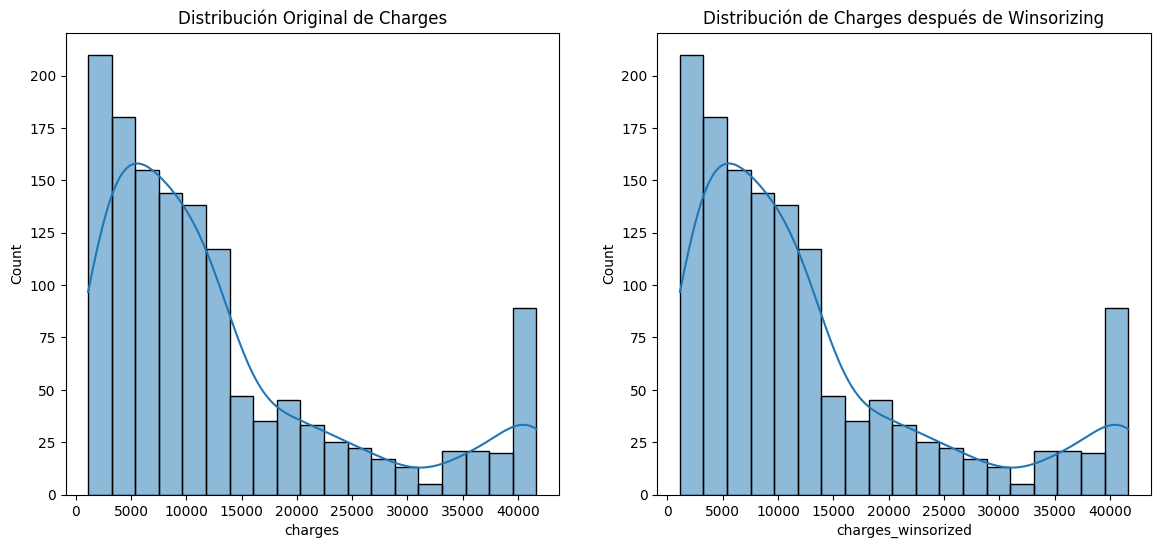

In [36]:
from scipy.stats import mstats

# Aplicar Winsorizing para limitar los outliers en la variable 'charges'
df['charges_winsorized'] = mstats.winsorize(df['charges'], limits=[0, 0.05])  # Limitar solo en el 5% superior

# Comparar la distribución antes y después del Winsorizing
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['charges'], kde=True)
plt.title('Distribución Original de Charges')

plt.subplot(1, 2, 2)
sns.histplot(df['charges_winsorized'], kde=True)
plt.title('Distribución de Charges después de Winsorizing')

plt.show()

In [39]:

# 1. Seleccionar las variables a incluir en el modelo
numerical_features = ['age', 'bmi', 'children']  # Variables numéricas
target = 'charges_winsorized'  # Variable objetivo

# 2. Codificación de variables categóricas
categorical_features = pd.get_dummies(df[categorical_columns], drop_first=True)  # Codificación one-hot

# 3. Combinar todo en un solo dataframe
df_model = pd.concat([df[numerical_features], categorical_features, df[target]], axis=1)

print(df_model.shape)

# Visualizar el dataframe final
df_model.head()



(1337, 9)


,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,charges_winsorized
0,19,27.900,0,False,True,False,False,True,16884.92400
1,18,33.770,1,True,False,False,True,False,1725.55230
2,28,33.000,3,True,False,False,True,False,4449.46200
3,33,22.705,0,True,False,True,False,False,21984.47061
4,32,28.880,0,True,False,True,False,False,3866.85520


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# 1. Dividir los datos en conjunto de entrenamiento y prueba
X = df_model.drop('charges_winsorized', axis=1)
y = df_model['charges_winsorized']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Entrenar el modelo de regresión lineal múltiple
model = LinearRegression()
model.fit(X_train, y_train)

# 3. Realizar predicciones y evaluar el modelo
y_pred = model.predict(X_test)

# 4. Calcular las métricas
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"R²: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")

R²: 0.8243
MAE: 3785.2119
MSE: 27122788.0189
RMSE: 5207.9543


Optimización de hiperparámetros para mejorar métricas.

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso

# Definir los hiperparámetros a probar
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Optimización para Ridge
ridge = Ridge()
ridge_cv = GridSearchCV(ridge, param_grid, cv=5)
ridge_cv.fit(X_train, y_train)

# Optimización para Lasso
lasso = Lasso()
lasso_cv = GridSearchCV(lasso, param_grid, cv=5)
lasso_cv.fit(X_train, y_train)

# Resultados de la optimización
print(f"Mejor alpha para Ridge: {ridge_cv.best_params_['alpha']}")
print(f"Mejor alpha para Lasso: {lasso_cv.best_params_['alpha']}")

# Evaluar el rendimiento con los mejores modelos
ridge_best = ridge_cv.best_estimator_
lasso_best = lasso_cv.best_estimator_

ridge_pred = ridge_best.predict(X_test)
lasso_pred = lasso_best.predict(X_test)

ridge_r2 = r2_score(y_test, ridge_pred)
lasso_r2 = r2_score(y_test, lasso_pred)

print(f"R² con Ridge: {ridge_r2:.4f}")
print(f"R² con Lasso: {lasso_r2:.4f}")

Mejor alpha para Ridge: 1
Mejor alpha para Lasso: 10
R² con Ridge: 0.8234
R² con Lasso: 0.8234


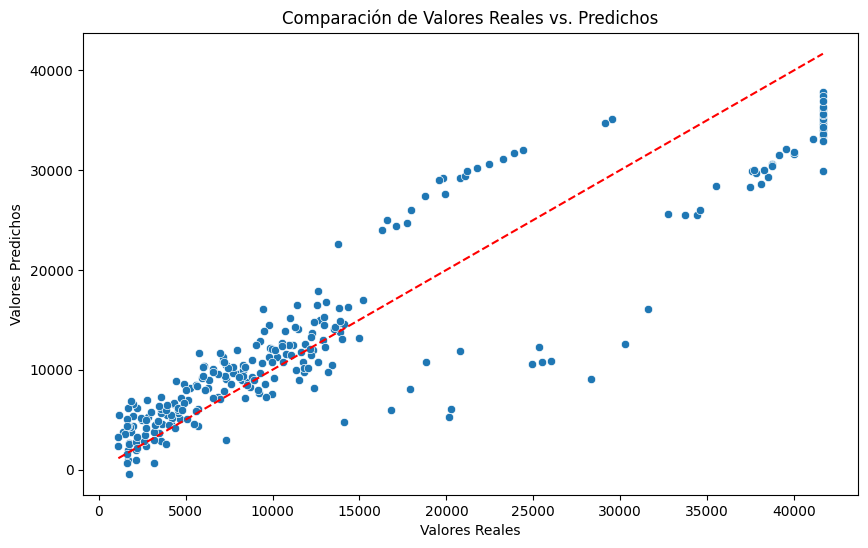

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Predicciones del modelo (usaremos Ridge como ejemplo)
y_pred = ridge_best.predict(X_test)

# Gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Línea ideal
plt.title('Comparación de Valores Reales vs. Predichos')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.show()